# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
  encoded = list()
  for num in y:
    temp = np.zeros(10)
    temp[num] = 1
    encoded.append(temp)
  
  return np.array(encoded)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
#code here

callback = keras.callbacks.EarlyStopping(patience=3,min_delta = 0.01)

cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(64,3, activation='relu', padding="same"))
cnn.add(keras.layers.Conv2D(64,3, activation='relu', padding="same"))
cnn.add(keras.layers.Conv2D(64,3, activation='relu', padding="same"))
cnn.add(keras.layers.Conv2D(64,3, activation='relu', padding="same"))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dropout(0.2))
# cnn.add(keras.layers.Dense(100,activation = 'relu'))
# cnn.add(keras.layers.Dense(70, activation = 'relu'))

cnn.add(keras.layers.Dense(10, activation ='softmax'))

opti = keras.optimizers.SGD(learning_rate = 0.01)

cnn.compile(loss = keras.losses.categorical_crossentropy,optimizer = opti, metrics=['accuracy'])


cnn.build((60000,28,28,1))
cnn.save_weights('cnn.h5')
history = cnn.fit(x_train, y_train,epochs = 10, validation_data=(x_test,y_test), batch_size= 128 , callbacks=[callback])




Epoch 1/10
469/469 [==============================] - 23s 26ms/step - loss: 0.6977 - accuracy: 0.7948 - val_loss: 0.3273 - val_accuracy: 0.9033
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.3152 - accuracy: 0.9085 - val_loss: 0.2584 - val_accuracy: 0.9270
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2226 - accuracy: 0.9364 - val_loss: 0.1497 - val_accuracy: 0.9562
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1343 - accuracy: 0.9621 - val_loss: 0.0924 - val_accuracy: 0.9731
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0991 - accuracy: 0.9712 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0822 - accuracy: 0.9763 - val_loss: 0.0660 - val_accuracy: 0.9778
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.0577 - val_accuracy:

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 10)                5

In [ ]:
score = cnn.evaluate(x_test, y_test, verbose = 0)
# print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test accuracy: 0.9829999804496765


In [ ]:
# print(history.history['accuracy']


In [ ]:
print(history.history['accuracy'][-1])

0.9831666946411133


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


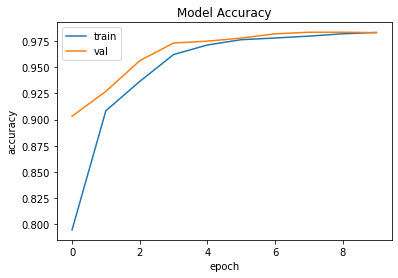

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history1):
  plt.plot(history1.history['accuracy'])
  plt.plot(history1.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

plot_accuracy(history)

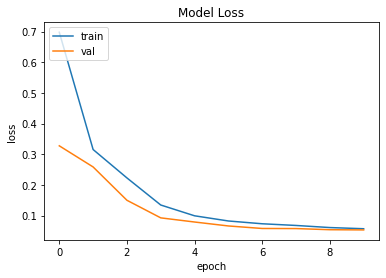

In [ ]:
def plot_loss(history1):
  plt.plot(history1.history['loss'])
  plt.plot(history1.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

plot_loss(history)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
import random
def randomise(y_t,per):
  print(y_t.shape[0])
  indexs = random.sample( range(0 , y_t.shape[0]) ,int(per*y_t.shape[0]) )
  for index in indexs:
    y_t[index] = np.zeros(10)
    num = random.randint(0,9)
    y_t[index][num] = 1


In [ ]:
def create_noisy_models(per):
  y_temp = np.copy(y_train)
  cnn.load_weights('cnn.h5')
  randomise(y_temp , per)
  history_n = cnn.fit(x_train, y_temp,epochs = 10, validation_data=(x_test,y_test), batch_size = 128 , callbacks=[callback])
  print("Results for",int(per*100))
  score = cnn.evaluate(x_test, y_test, verbose = 0)
  # print('Test loss:', score[0])
  print('Train_accuracy',history_n.history['accuracy'][-1])
  print('Test accuracy:', score[1])
  plot_accuracy(history_n)
  plot_loss(history_n)
  print("=====================================================================")


60000
Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 1.4314 - accuracy: 0.6348 - val_loss: 0.6118 - val_accuracy: 0.8798
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 1.1873 - accuracy: 0.7319 - val_loss: 0.5349 - val_accuracy: 0.9179
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 1.1220 - accuracy: 0.7550 - val_loss: 0.4655 - val_accuracy: 0.9429
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 1.0570 - accuracy: 0.7781 - val_loss: 0.3882 - val_accuracy: 0.9597
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 1.0251 - accuracy: 0.7867 - val_loss: 0.4190 - val_accuracy: 0.9617
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 1.0074 - accuracy: 0.7908 - val_loss: 0.3388 - val_accuracy: 0.9690
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.9956 - accuracy: 0.7937 - val_loss: 0.3423 - val_acc

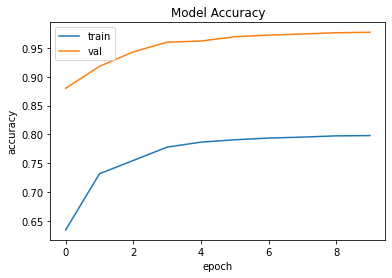

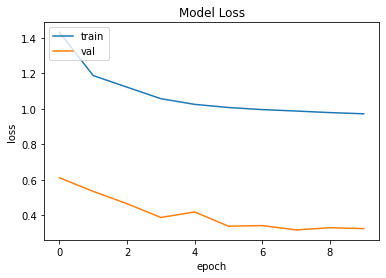

60000
Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 1.8581 - accuracy: 0.4843 - val_loss: 0.8990 - val_accuracy: 0.8650
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 1.6897 - accuracy: 0.5635 - val_loss: 0.8368 - val_accuracy: 0.9001
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 1.6543 - accuracy: 0.5777 - val_loss: 0.7956 - val_accuracy: 0.9194
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 1.6152 - accuracy: 0.5934 - val_loss: 0.7256 - val_accuracy: 0.9477
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 1.5829 - accuracy: 0.6058 - val_loss: 0.7199 - val_accuracy: 0.9600
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 1.5648 - accuracy: 0.6114 - val_loss: 0.6153 - val_accuracy: 0.9629
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 1.5523 - accuracy: 0.6142 - val_loss: 0.5347 - val_acc

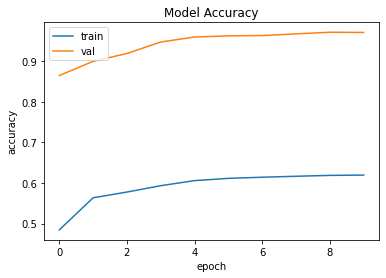

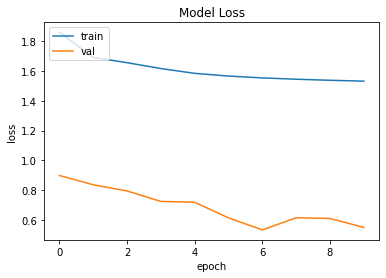

60000
Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 2.1295 - accuracy: 0.3250 - val_loss: 1.3105 - val_accuracy: 0.8417
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 2.0290 - accuracy: 0.3994 - val_loss: 1.1695 - val_accuracy: 0.8761
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 2.0111 - accuracy: 0.4092 - val_loss: 1.1195 - val_accuracy: 0.8956
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 1.9953 - accuracy: 0.4167 - val_loss: 1.1428 - val_accuracy: 0.9169
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 1.9791 - accuracy: 0.4246 - val_loss: 1.0548 - val_accuracy: 0.9238
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 1.9637 - accuracy: 0.4328 - val_loss: 1.0887 - val_accuracy: 0.9417
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 1.9520 - accuracy: 0.4375 - val_loss: 0.9241 - val_acc

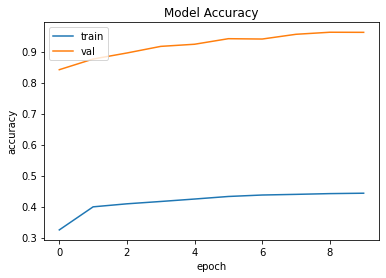

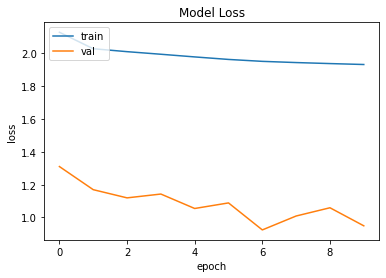

60000
Epoch 1/10
469/469 [==============================] - 12s 25ms/step - loss: 2.2754 - accuracy: 0.1840 - val_loss: 1.7693 - val_accuracy: 0.7850
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 2.2352 - accuracy: 0.2401 - val_loss: 1.6630 - val_accuracy: 0.8383
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 2.2277 - accuracy: 0.2465 - val_loss: 1.6749 - val_accuracy: 0.8361
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 2.2236 - accuracy: 0.2493 - val_loss: 1.6196 - val_accuracy: 0.8537
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 2.2201 - accuracy: 0.2526 - val_loss: 1.6673 - val_accuracy: 0.8733
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 2.2166 - accuracy: 0.2543 - val_loss: 1.6334 - val_accuracy: 0.8815
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 2.2131 - accuracy: 0.2557 - val_loss: 1.5912 - val_acc

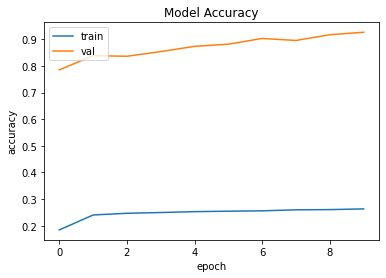

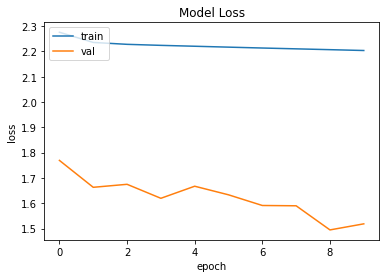

60000
Epoch 1/10
469/469 [==============================] - 12s 26ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3007 - val_accuracy: 0.1320
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 2.3024 - accuracy: 0.1032 - val_loss: 2.3004 - val_accuracy: 0.1264
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 2.3022 - accuracy: 0.1032 - val_loss: 2.2999 - val_accuracy: 0.1066
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 2.3020 - accuracy: 0.1056 - val_loss: 2.3000 - val_accuracy: 0.1376
Results for 100
Train_accuracy 0.10563333332538605
Test accuracy: 0.13760000467300415


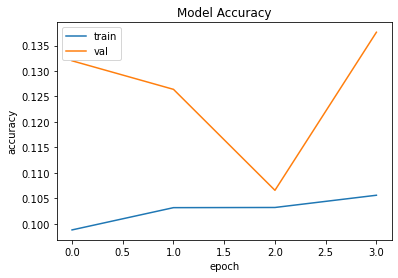

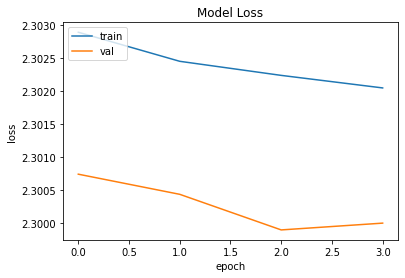

In [ ]:
percents = [0.2 ,0.4, 0.6, 0.8, 1]

for p in percents:
  create_noisy_models(p)